In [60]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

In [88]:
# cd Brain-Dogs/Pre-processing/

In [89]:
data = genfromtxt('../test_data/shouvik1602/shouvik1602.csv', delimiter=',', dtype = np.float32)
data[0][:]

array([ nan,  nan], dtype=float32)

In [90]:
Data = data[1::][:]  #contains both fp1 and fp2

In [91]:
data.shape
fp2 = data[:,[1]] 
fp1 = np.ndarray(shape = (12805,))
fp1 = data[:,[0]]
fp1 = fp1.reshape(12805,)
fp1.shape

(12805,)

In [92]:
len(fp2)
data 

array([[    nan,     nan],
       [-16384., -16384.],
       [  4120.,   4120.],
       ..., 
       [-16384., -16384.],
       [ -9342.,  -9250.],
       [-16384., -16384.]], dtype=float32)

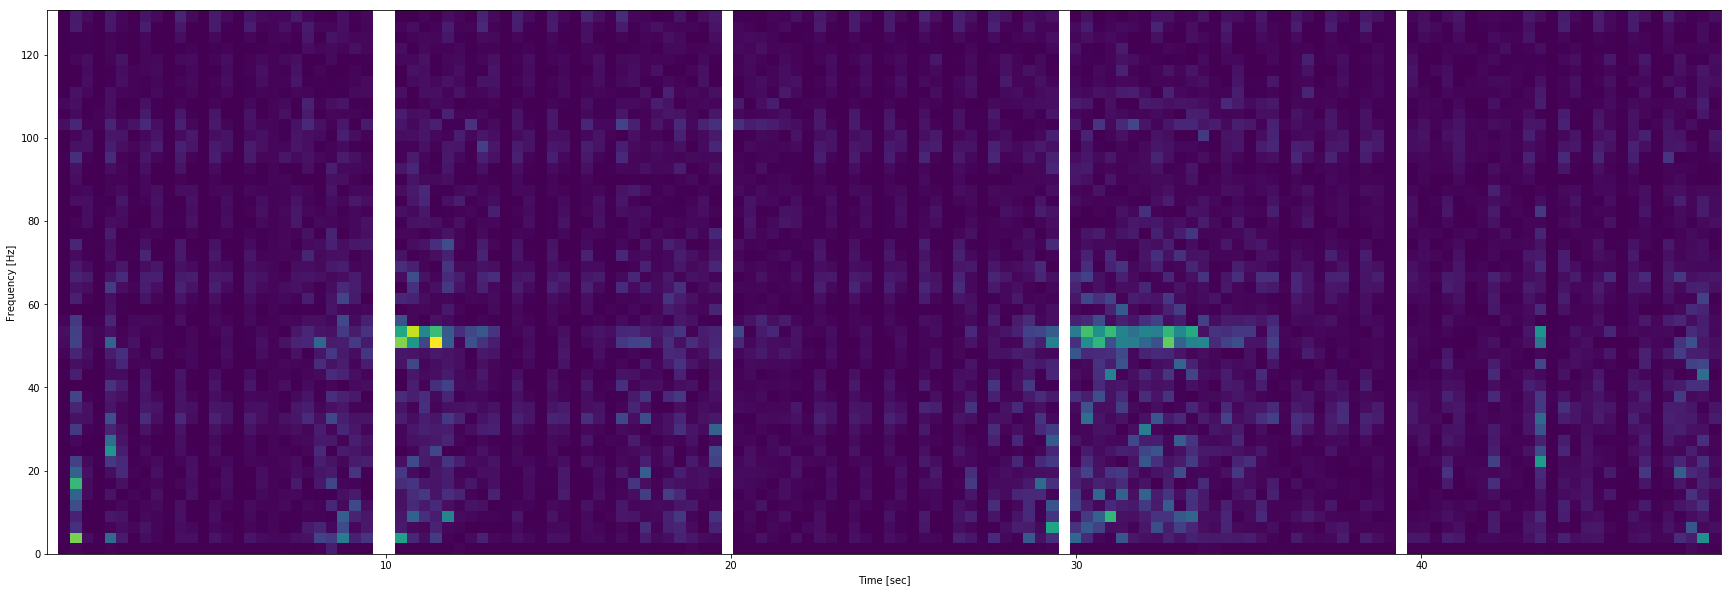

In [87]:
WINDOW_LEN = 100
OVERLAP_LEN = WINDOW_LEN / 8
DATA_LEN = 12805
DURATION = 49
fs =  (DATA_LEN - 1) / DURATION
eps = 1/(fs * 1000.0)

y = fp1
x = np.arange(0, DURATION + 1/fs, 1/fs)

f, t, Sxx = spectrogram(y, fs=fs, nperseg=WINDOW_LEN)

T = np.zeros( int(1 +  np.floor((len(y) - WINDOW_LEN) / (WINDOW_LEN - OVERLAP_LEN))) )

T[0] = x[int(WINDOW_LEN/2)]
T[1:] = [x[int(WINDOW_LEN / 2 + (n + 1) * (WINDOW_LEN - OVERLAP_LEN))] for n in np.arange(0,len(T) - 1)]
plt.figure(figsize=(30,10))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
